# SARSA

SARSA stands for "state action reward state action", it gets this name because the agent updates the reward function every time it takes an action, the idea is that the agent is an state, takes an action collects a reward, observes its new state, and decides what action he will take in this new state; then using this information he learns how good the original decision was(updates its $Q$ function for the original state-action pair), and updates his policy. The rule is:



$$ Q_(s, a) \leftarrow Q(s_{t}, a_{t}) + \alpha(R_t + \gamma*Q(s_{t+1}, a_{t+1}) - Q(s_{t}, a_{t}))$$



This a basic bootstrapping technique, $R_t + \gamma*Q(s_{t+1}, a_{t+1})$ is just an estimate for the state value action, based on what was observed in that episode, and what we already know for the next state-action. Which means $\alpha(R_t + \gamma*Q(s_{t+1}, a_{t+1}) - Q(s_{t}, a_{t}))$ is a $\alpha$-size step on the direction of this estimate.



After updating the $Q$ function, we will update our policy, take the action we already decided on and repeat the process.



So that is really all there is to it. Since this is much simpler to implement than monte carlo I won't go through the details in the notebook, you can directly check how the class is implemented on the code base, it should be pretty easy to understand.

In [1]:
import sys

sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt

from grid_world.action import Action
from grid_world.grid_world import GridWorld
from grid_world.agents.sarsa_agent import SarsaAgent
from grid_world.visualization.format_objects import (
    get_policy_rec_str,
    get_policy_eval_str,
    get_world_str,
)
from grid_world.utils.returns import returns_from_reward
from grid_world.utils.policy import get_policy_rec, get_random_policy, sample_action

np.random.seed(21)

# World

We will use the same world

In [2]:
gworld = GridWorld(
    grid_shape=(4, 5),
    terminal_states_coordinates=((0, 4),),
    walls_coordinates=((0, 1), (1, 1), (2, 3)),
    traps_coordinates=((1, 3),),
)
print(get_world_str(gworld))

3               

2          █    

1    █     ☠    

0 ⚐  █        ✘ 

  0  1  2  3  4 


# Agent

Just need to instantiate our agent

In [3]:
def reward(e):
    if e == 1:
        return 0
    elif e == -1:
        return -10
    else:
        return -1


agent = SarsaAgent(
    world=gworld,
    reward_function=reward,
    actions=[Action.up, Action.down, Action.left, Action.right],
    gamma=1,
    alpha=0.1,
    epsilon=0.1,
)

# Train

Training is just what we would expect. The agent will make a bunch of runs through the world, learning from each step it takes.

In [4]:
episode_lengths, episode_returns = agent.train(episodes=200)
pi_r = get_policy_rec(agent.policy, gworld, agent.actions)
print(get_policy_rec_str(pi_r, gworld))

 ↑  ↑  ↓  ←  → 

 →  →  ↓  █  ↓ 

 ↑  █  ↓  ☠  ↓ 

 ↑  █  →  →  ✘ 




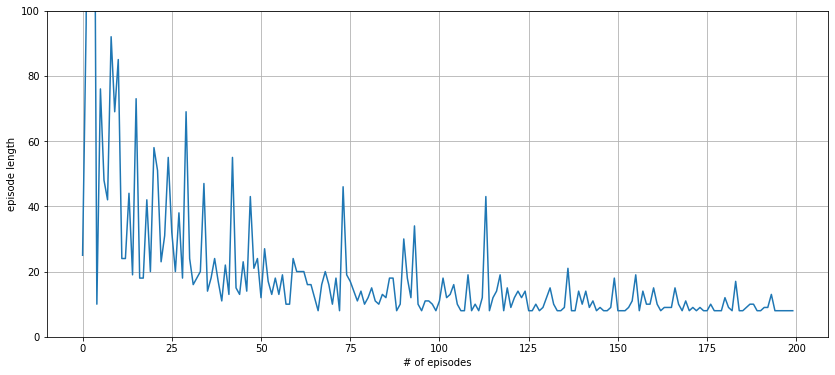

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(episode_lengths)

ax.set(xlabel="# of episodes", ylabel="episode length", ylim=[0, 100])
ax.grid()

plt.show()

We can see that the agent gets really good, it even learned the optimal path. We will make some more in depth comparison between agents in other notebooks.